# [Project 4]_유가_데이터를_활용한_주유소_시장분석

---

## 프로젝트 목표
- <한국석유공사 제품별 주유소 판매가격> 데이터의 가격/지역/브랜드/셀프여부를 분석하여 주유소 시장 관련 인사이트 도출
- 실제 연구/실무에서 활용되는 필수 분석 과정 및 기법에 대해 학습

---

## 프로젝트 목차
1. **데이터 Cleansing 및 Feature Engineering:** 분석을 위한 사전 점검 및 데이터 개괄 이해 <br>
    1.1. 2018년 데이터 기준 데이터 Cleansing 및 Feature Engineering<br>
    1.2. Cleansing 및 Feature Engineering 함수 생성 및 전체 년도 데이터 적용 <br>
    1.3. 연도별 데이터 Outer Join<br>
<br> 

2. **주유소 개폐업 현황 분석:** 연도별 주유소 ID 비교를 통한 개폐업 현황 분석<br>
    2.1. 연도별 개폐업 수치 분석<br>
<br>

3. **브랜드 분석:** 브랜드별 가격경쟁력 및 시장점유율 분석<br>
    3.1. 주요 브랜드별 가격 Line Plot 분석<br>
    3.2. 주요 브랜드별 지난 4년간 시장 점유율 Stacked Bar Plot 및 Heatmap 분석<br>
<br>

4. **가격 분석:** 주유소 및 지역 별 가격 편차 분석<br>
    4.1. 가격 분포 Boxplot<br>
    4.2. 지역별 가격 분포 Boxplot (Multiple Columns)<br>
<br>


---

## 데이터 출처
-  https://www.data.go.kr/data/15044628/fileData.do
- Opinet 유가내려받기: 2018 ~ 2021년 4개년에 대해 각각 6월 1일~7일 데이터 추출
- 프로젝트에 필요한 컬럼만 추출

---

## 프로젝트 개요

행정안전부 공공데이터 포털에 등재되어있는 `한국석유공사 제품별 주유소 판매가격`은 전국 10000개 이상의 주유소에 대해 가격/지역/브랜드/셀프여부 등 방대한 데이터를 제공하고 있습니다. 이 데이터를 정유업체 전략기획팀 실무자의 입장에서 분석하여 주유소 시장에 대한 인사이트를 도출해봅시다. 

먼저, 주유소별로 7일치씩 쌓여있는 데이터를 요약하여 주유소별로 1개의 행이 되도록 각 년도 데이터를 가공 해봅시다. 그리고 이 데이터를 통해 지난 4년동안 몇개의 주유소가 개업 및 폐업 했는지 분석해 봅시다. 다음, 브랜드별 가격경쟁력 및 지난 4년간 시장 점유율 변화를 분석해 봅시다. 마지막으로 주유소별 가격 편차가 어느정도 되는지 알아보고, 지역별로도 유의미한 차이가 있는지 분석해 봅시다. 

## 1. 데이터 Cleansing 및 Feature Engineering

필요한 패키지를 `import`한 후 분석을 위한 사전 점검과 함께 데이터 개괄을 이해합니다.

### 1.1. 18년 데이터 기준 데이터 점검 및 Cleansing

In [90]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus']=False

In [27]:
f18 = pd.read_csv(f'./data/과거_판매가격(주유소)_2018.csv')

In [28]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
0,기준 : 일간(20180601~20180607),NaN,NaN,NaN,NaN,NaN
1,A0011536,20180601.0,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,20180602.0,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,20180603.0,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,20180604.0,강원 강릉시,SK에너지,셀프,1579.0


In [34]:
# 0번 row 제거
f18 = f18.drop(0) 

In [35]:
# 변수별 null값 확인 결과 null 없음
f18.isna().sum() 

번호      0
기간      0
지역      0
상표      0
셀프여부    0
휘발유     0
dtype: int64

In [36]:
# include='all': 카테고리형 변수도 정보 제공
f18.describe(include='all') 

,번호,기간,지역,상표,셀프여부,휘발유
count,81466,8.146600e+04,81466,81466,81466,81466.000000
unique,11673,NaN,229,9,2,NaN
top,A0011536,NaN,충북 청주시,SK에너지,일반,NaN
freq,7,NaN,1574,24531,49850,NaN
mean,NaN,2.018060e+07,NaN,NaN,NaN,1603.579714
std,NaN,2.000113e+00,NaN,NaN,NaN,112.806463
min,NaN,2.018060e+07,NaN,NaN,NaN,0.000000
25%,NaN,2.018060e+07,NaN,NaN,NaN,1579.000000
50%,NaN,2.018060e+07,NaN,NaN,NaN,1598.000000
75%,NaN,2.018061e+07,NaN,NaN,NaN,1625.000000


#### describe 점검 포인트:
- unique 번호가 11673개이며 최대 7번까지 기록되었음
- 기간이 수치로 인식되고 있음
- unique 지역 개수가 229이어서 너무 많음
- unique 상표 개수가 9개이므로 적절함
- unique 셀프여부 개수가 2개이며, 셀프여부는 각각 절반정도 비중을 차지함
- 휘발유 min이 0임 &rarr; 휘발유의 '가격'인데 0일리 없음. 뭔가 잘못된 데이터거나 할 수 있으므로 해당 row를 살펴보고 제거해주던가 하는 작업이 필요함

In [37]:
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
1,A0011536,20180601.0,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,20180602.0,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,20180603.0,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,20180604.0,강원 강릉시,SK에너지,셀프,1579.0
5,A0011536,20180605.0,강원 강릉시,SK에너지,셀프,1579.0


In [38]:
# 기간을 datetime 형태로 변환
# 현재 기간 데이터는 20180601.0 과 같은형태로 들어가있음. 그래서 int(x)를 사용해여 정수형으로 먼저 바꾸어 소수점을 없애준 뒤 string 변환 작업을 수행함
f18['기간'] = f18['기간'].apply(lambda x:pd.to_datetime(str(int(x)))) 
f18.head()

,번호,기간,지역,상표,셀프여부,휘발유
1,A0011536,2018-06-01,강원 강릉시,SK에너지,셀프,1579.0
2,A0011536,2018-06-02,강원 강릉시,SK에너지,셀프,1579.0
3,A0011536,2018-06-03,강원 강릉시,SK에너지,셀프,1579.0
4,A0011536,2018-06-04,강원 강릉시,SK에너지,셀프,1579.0
5,A0011536,2018-06-05,강원 강릉시,SK에너지,셀프,1579.0


In [39]:
# 지역 변수 중 첫 지역 구분만 컬럼 형성
region_len = f18['지역'].apply(lambda x: len(x.split())) 
print(f"min: {min(region_len)},max: {max(region_len)}")

min: 1,max: 2


In [40]:
f18['지역2'] = f18['지역'].apply(lambda x:x.split()[0])
import collections
collections.Counter(f18['지역2'])

Counter({'경기': 16341,
         '경북': 8918,
         '경남': 8049,
         '충남': 7158,
         '전북': 6278,
         '전남': 6260,
         '충북': 5136,
         '강원': 4691,
         '서울': 3589,
         '부산': 2936,
         '대구': 2555,
         '인천': 2345,
         '광주': 1984,
         '대전': 1721,
         '울산': 1706,
         '제주': 1351,
         '세종시': 448})

In [41]:
# 휘발유값 0인 ROW 확인
f18.loc[f18['휘발유']==0].head(10) 

,번호,기간,지역,상표,셀프여부,휘발유,지역2
1019,A0010629,2018-06-07,강원 삼척시,현대오일뱅크,일반,0.0,강원
1159,A0010700,2018-06-07,강원 삼척시,현대오일뱅크,셀프,0.0,강원
1370,A0010458,2018-06-01,강원 양구군,SK에너지,일반,0.0,강원
1371,A0010458,2018-06-02,강원 양구군,SK에너지,일반,0.0,강원
1372,A0010458,2018-06-03,강원 양구군,SK에너지,일반,0.0,강원
1373,A0010458,2018-06-04,강원 양구군,SK에너지,일반,0.0,강원
1374,A0010458,2018-06-05,강원 양구군,SK에너지,일반,0.0,강원
1375,A0010458,2018-06-06,강원 양구군,SK에너지,일반,0.0,강원
1376,A0010458,2018-06-07,강원 양구군,SK에너지,일반,0.0,강원
1575,A0011234,2018-06-03,강원 영월군,SK에너지,일반,0.0,강원


In [42]:
f18.loc[f18['번호']=='A0010629']

,번호,기간,지역,상표,셀프여부,휘발유,지역2
1013,A0010629,2018-06-01,강원 삼척시,현대오일뱅크,일반,1595.0,강원
1014,A0010629,2018-06-02,강원 삼척시,현대오일뱅크,일반,1595.0,강원
1015,A0010629,2018-06-03,강원 삼척시,현대오일뱅크,일반,1595.0,강원
1016,A0010629,2018-06-04,강원 삼척시,현대오일뱅크,일반,1595.0,강원
1017,A0010629,2018-06-05,강원 삼척시,현대오일뱅크,일반,1595.0,강원
1018,A0010629,2018-06-06,강원 삼척시,현대오일뱅크,일반,1595.0,강원
1019,A0010629,2018-06-07,강원 삼척시,현대오일뱅크,일반,0.0,강원


In [62]:
# 휘발유값 0인 ROW 제거
f18 = f18.loc[f18['휘발유']!=0,:] # 행은 조건으로 필터링, 열은 전체선택 -> 휘발유값이 0인 행은 제거

In [44]:
f18.describe(include='all')

,번호,기간,지역,상표,셀프여부,휘발유,지역2
count,81167,81167,81167,81167,81167,81167.000000,81167
unique,11641,NaN,229,9,2,NaN,17
top,A0011536,NaN,충북 청주시,SK에너지,일반,NaN,경기
freq,7,NaN,1567,24444,49590,NaN,16306
mean,NaN,2018-06-03 23:57:25.651557888,NaN,NaN,NaN,1609.486922,NaN
min,NaN,2018-06-01 00:00:00,NaN,NaN,NaN,1500.000000,NaN
25%,NaN,2018-06-02 00:00:00,NaN,NaN,NaN,1579.000000,NaN
50%,NaN,2018-06-04 00:00:00,NaN,NaN,NaN,1598.000000,NaN
75%,NaN,2018-06-06 00:00:00,NaN,NaN,NaN,1625.000000,NaN
max,NaN,2018-06-07 00:00:00,NaN,NaN,NaN,2282.000000,NaN


## 주유소별 데이터 정합성 확인(7일동안 변화 없었다는 전제)

주유소별로 7일동안 지역, 상표, 셀프여부 변화가 없었다는 전제 하에 정합성 검사를 실시

In [50]:
#주유소별 데이터 정합성 확인(7일동안 변화 없었다는 전제)
unique_count = f18.groupby('번호')[['지역','상표','셀프여부']].nunique() # unique()는 값 자체, nunique()는 유니크한 값의 개수를 출력함
unique_count.head()

,지역,상표,셀프여부
번호,,,
A0000004,1,1,1
A0000011,1,1,1
A0000012,1,1,1
A0000014,1,1,1
A0000015,1,1,1


### unique_count가 1이 아닌수(sum)가 0이 아닐경우 -> 1이 아닌값이 존재한다.
- unique_count != 1  : 1이 아닌경우 (즉, 값이 바뀐 항목)
- .sum(axis=1) : 바뀐항목이 몇개인지 합산
- != 0 : 하나라도 바뀐 항목이 있다면 True
- loc[...] : 그런 행만 필터링

In [56]:
# unique_count가 1이 아닌수(sum)가 0이 아닐경우 -> 1이 아닌값이 존재한다.
target = unique_count.loc[(unique_count!=1).sum(axis=1)!=0]
print(target)
target.index

          지역  상표  셀프여부
번호                    
A0012639   1   2     1
A0016076   1   2     1


Index(['A0012639', 'A0016076'], dtype='object', name='번호')

In [58]:
f18.loc[f18['번호'].isin(target.index)]

,번호,지역,지역2,상표,셀프여부,휘발유


### 정핪겅에 문제가 있었던 주유소(번호)가 포함된 행은 제거하고 나머지 행만 남김

```python
f18 = f18.loc[~f18['번호'].isin(target.index)]
```
- f18[...] : f18 데이터 프레임에서 조건을 만족하는 행만 남기도록함
- f18['번호'].isin(target.index) 번호가 target에 포함된 주유소인지 여부 (True/False 시리즈)
- ~ 부정연산자 : 포함되지 않은 것만 선택
- .loc[...] 조건에 맞는 행을 필터링



In [57]:
f18 = f18.loc[~f18['번호'].isin(target.index)]

### 주유소별 데이터 통합
- 지역, 지역2 : 지역은 7일동안 바뀌지 않는다는 전제이므로 암우날이나 괜찮음. first 행을 뽑아옴
- 상표, 셀프여부 : 마찬가지로 고정된 값 사용
- 휘발유 : 하루하루 가격이 다를 수 있으니 mean 평균값 사용

In [ ]:
# 주유소별 데이터 통합
''' 
지역, 지역2 : 지역은 7일동안 바뀌지 않는다는 전제이므로 암우날이나 괜찮음. first 행을 뽑아옴
상표, 셀프여부 : 마찬가지로 고정된 값 사용
휘발유 : 하루하루 가격이 다를 수 있으니 mean 평균값 사용
'''
f18 = f18.groupby('번호')\
    .agg({'지역':'first','지역2':'first','상표':'first','셀프여부':'first','휘발유':'mean'})\
    .reset_index() 

In [59]:
f18.describe(include='all')

,번호,지역,지역2,상표,셀프여부,휘발유
count,11639,11639,11639,11639,11639,11639.000000
unique,11639,229,17,9,2,NaN
top,A0000004,충북 청주시,경기,SK에너지,일반,NaN
freq,1,224,2343,3505,7106,NaN
mean,NaN,NaN,NaN,NaN,NaN,1609.491097
std,NaN,NaN,NaN,NaN,NaN,56.959482
min,NaN,NaN,NaN,NaN,NaN,1525.000000
25%,NaN,NaN,NaN,NaN,NaN,1579.000000
50%,NaN,NaN,NaN,NaN,NaN,1598.000000
75%,NaN,NaN,NaN,NaN,NaN,1625.000000


### 1.2. Cleansing 및 Feature Engineering 함수 생성 및 전체 년도 데이터 적용

In [61]:
def preprocess(df):
    df_copy=df.copy() # 필터링 전
    
    df = df.drop(0)
    df['기간'] = df['기간'].apply(lambda x:pd.to_datetime(str(int(x))))
    df['지역2'] = df['지역'].apply(lambda x:x.split()[0])
    df = df.loc[df['휘발유']!=0,:]
    unique_count = df.groupby('번호')[['번호','지역','상표','셀프여부']].nunique()
    target = unique_count.loc[(unique_count!=1).sum(axis=1)!=0,:]
    df = df.loc[~df['번호'].isin(target.index),:]
    df = df.groupby('번호')\
        .agg({'지역':'first','지역2':'first','상표':'first','셀프여부':'first','휘발유':'mean'})\
        .reset_index()
    
    out = set(df_copy['번호']).difference(set(df['번호'])) # 필터링 후 
    return(df,out)

In [63]:
f_dict = dict()
out_all = set() # 이상치 발견한 주유소 번호 저장
for year in range(2018,2022):
    df = pd.read_csv(f'./data/과거_판매가격(주유소)_{year}.csv')
    f_dict[year], out = preprocess(df)
    out_all.update(out)

In [65]:
f_dict[2019]

,번호,지역,지역2,상표,셀프여부,휘발유
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1529.000000
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1524.000000
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1529.000000
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1549.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1512.428571
...,...,...,...,...,...,...
11466,A0033372,광주 북구,광주,S-OIL,셀프,1465.000000
11467,A0033373,경기 평택시,경기,GS칼텍스,셀프,1495.571429
11468,A0033374,경기 용인시,경기,S-OIL,일반,1513.285714
11469,A0033388,경기 김포시,경기,SK에너지,셀프,1517.000000


### 1.3. 연도별 데이터 Outer Join

In [64]:
key = list(f_dict[2018].columns)
key.remove('휘발유')
print(key)

['번호', '지역', '지역2', '상표', '셀프여부']


`key`를 기준으로 외부조인 시행 <br>
suffixes를 통해 중복되는 열이름에는 _2018, _2019를 붙이도록함

In [66]:
m1 = pd.merge(f_dict[2018],f_dict[2019],on=key,how='outer',suffixes=('_2018', '_2019'))
m2 = pd.merge(f_dict[2020],f_dict[2021],on=key,how='outer',suffixes=('_2020', '_2021'))
m = pd.merge(m1,m2,on=key,how='outer')

In [67]:
m.head()

,번호,지역,지역2,상표,셀프여부,휘발유_2018,휘발유_2019,휘발유_2020,휘발유_2021
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0,1529.000000,1289.714286,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0,1524.000000,1283.571429,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0,1529.000000,1287.285714,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0,1549.000000,1314.000000,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0,1512.428571,1289.285714,1575.714286


모든 주유소는 한개의 행으로 표현되어야 하므로 groupby를 통해 검증

In [68]:
m.groupby('번호').size().sort_values(ascending=False).head()

번호
A0019752    4
A0016166    3
A0018959    3
A0033031    3
A0011875    3
dtype: int64

In [69]:
m.loc[m['번호']=='A0019752'] # A0019752는 4개가 나옴. 이상한 결과이기 때문에 따로 확인

,번호,지역,지역2,상표,셀프여부,휘발유_2018,휘발유_2019,휘발유_2020,휘발유_2021
7733,A0019752,광주 북구,광주,GS칼텍스,셀프,NaN,1536.0,NaN,NaN
7734,A0019752,광주 북구,광주,알뜰주유소,셀프,NaN,NaN,NaN,1509.714286
7735,A0019752,광주 북구,광주,자가상표,셀프,NaN,NaN,1239.0,NaN
7736,A0019752,광주 북구,광주,현대오일뱅크,셀프,1596.0,NaN,NaN,NaN


매 해마다 상표가 바뀌어서 같은 주유소가 4개나 기록 된것을 확인할 수 있음. <br> merge를 할 때 on조건에 '상표'를 넣었기 때문. <br> 이런 경우 데이터의 개수가 적으면 제거하는 식으로 처리하므로 개수를 확인함

In [70]:
(m.groupby('번호').size()>1).sum()

np.int64(1338)

In [71]:
key.remove('상표')
key

['번호', '지역', '지역2', '셀프여부']

In [72]:
m1 = pd.merge(f_dict[2018],f_dict[2019],on=key,how='outer',suffixes=('_2018', '_2019'))
m2 = pd.merge(f_dict[2020],f_dict[2021],on=key,how='outer',suffixes=('_2020', '_2021'))
m = pd.merge(m1,m2,on=key,how='outer')

In [73]:
m.head()

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0,GS칼텍스,1529.000000,GS칼텍스,1289.714286,GS칼텍스,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0,GS칼텍스,1524.000000,GS칼텍스,1283.571429,GS칼텍스,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0,GS칼텍스,1529.000000,GS칼텍스,1287.285714,GS칼텍스,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0,GS칼텍스,1549.000000,GS칼텍스,1314.000000,GS칼텍스,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0,현대오일뱅크,1512.428571,현대오일뱅크,1289.285714,현대오일뱅크,1575.714286


In [74]:
size = m.groupby('번호').size().sort_values(ascending=False)
size.head()

번호
A0033348    2
A0002532    2
A0007535    2
A0033180    2
A0023051    1
dtype: int64

In [75]:
target = size[size>1].index
m.loc[m['번호'].isin(target)].sort_values('번호')

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
779,A0002532,경기 수원시,경기,S-OIL,셀프,1601.571429,S-OIL,1511.714286,NaN,NaN,NaN,NaN
780,A0002532,경기 용인시,경기,NaN,셀프,NaN,NaN,NaN,S-OIL,1278.285714,S-OIL,1515.857143
2403,A0007535,경기 수원시,경기,SK에너지,일반,1609.000000,SK에너지,1524.000000,NaN,NaN,NaN,NaN
2404,A0007535,경기 용인시,경기,NaN,일반,NaN,NaN,NaN,SK에너지,1304.000000,SK에너지,1534.428571
11881,A0033180,경북 구미시,경북,SK에너지,일반,1590.571429,SK에너지,1511.142857,NaN,NaN,NaN,NaN
11882,A0033180,경북 의성군,경북,NaN,일반,NaN,NaN,NaN,SK에너지,1225.428571,SK에너지,1526.428571
12021,A0033348,강원 강릉시,강원,NaN,일반,NaN,NH-OIL,1500.000000,NaN,NaN,NaN,NaN
12022,A0033348,강원 삼척시,강원,NaN,일반,NaN,NaN,NaN,NH-OIL,1250.000000,NH-OIL,1540.000000


지역이 바뀌면서 2행씩 출력되는 행이 생긴 것을 확인할수 있음. <br>
해당 데이터가 많지 않으므로 제거하는 것으로 처리 <br>
다시 groupby를 통해 정합성을 검증하면 이제 모두 1만 남는걸 확인할 수 있음

In [79]:
m = m.loc[~m['번호'].isin(target)]
m.groupby('번호').size().sort_values(ascending=False).head()

번호
A0000004    1
A0023191    1
A0023160    1
A0023161    1
A0023164    1
dtype: int64

- `m['번호']`	모든 주유소 번호 목록
- `x not in out_all`	해당 번호가 제거 대상이 아닌 경우
- 리스트 컴프리헨션	Boolean mask 생성
- `.loc[...]`	True인 행만 남김
- `m` = ...	필터링 결과를 다시 m에 저장

In [80]:
# 이상치 발견되었던 주유소 필터링
m = m.loc[[x not in out_all for x in m['번호']]]

In [81]:
m.head()

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
0,A0000004,경기 광명시,경기,GS칼텍스,일반,1599.0,GS칼텍스,1529.000000,GS칼텍스,1289.714286,GS칼텍스,1545.857143
1,A0000011,서울 양천구,서울,GS칼텍스,일반,1594.0,GS칼텍스,1524.000000,GS칼텍스,1283.571429,GS칼텍스,1542.428571
2,A0000012,경기 용인시,경기,GS칼텍스,일반,1594.0,GS칼텍스,1529.000000,GS칼텍스,1287.285714,GS칼텍스,1552.142857
3,A0000014,강원 인제군,강원,GS칼텍스,일반,1609.0,GS칼텍스,1549.000000,GS칼텍스,1314.000000,GS칼텍스,1575.000000
4,A0000015,서울 송파구,서울,현대오일뱅크,셀프,1589.0,현대오일뱅크,1512.428571,현대오일뱅크,1289.285714,현대오일뱅크,1575.714286


---

## 2. 주유소 개폐업 현황 분석: 연도별 주유소 ID 비교를 통한 개폐업 현황 분석


### 2.1. 연도별 개폐업 수치 분석

In [86]:
m.loc[m['상표_2018'].isnull()].head()

,번호,지역,지역2,상표_2018,셀프여부,휘발유_2018,상표_2019,휘발유_2019,상표_2020,휘발유_2020,상표_2021,휘발유_2021
26,A0000069,서울 종로구,서울,NaN,셀프,NaN,SK에너지,1657.000000,SK에너지,1312.000000,SK에너지,1652.857143
30,A0000083,경기 평택시,경기,NaN,일반,NaN,현대오일뱅크,1491.857143,현대오일뱅크,1249.285714,현대오일뱅크,1527.571429
31,A0000084,강원 양양군,강원,NaN,셀프,NaN,NH-OIL,1540.000000,NH-OIL,1254.000000,NH-OIL,1556.142857
168,A0000520,서울 강서구,서울,NaN,셀프,NaN,S-OIL,1512.142857,S-OIL,1348.428571,S-OIL,1583.857143
313,A0000985,서울 양천구,서울,NaN,셀프,NaN,SK에너지,1515.142857,SK에너지,1319.285714,SK에너지,1563.285714


각 연도별로 해당 연도에 존재하는 주유소 리스트를 id_dict에 dictionary 형태로 저장한다 

In [98]:
id_dict2 = dict()
for year in range(2018, 2022):
    non_null_brand = m.loc[-m[f'상표_{year}'].isnull()]
    opened_list = non_null_brand['번호'].unique()
    id_dict2[year] = set(opened_list)

In [89]:
len(id_dict2[2021].difference(id_dict2[2020]))

223

In [82]:
id_dict=dict()
for year in range(2018,2022):
    id_dict[year] = set(m.loc[~m[f'상표_{year}'].isna()]['번호'].unique())

In [83]:
diff_dict=dict()
for year in range(2018,2021):
    opened = len(id_dict[year+1].difference(id_dict[year]))
    closed = len(id_dict[year].difference(id_dict[year+1]))
    diff_dict[f'{year}_{year+1}']=[opened,closed]
diff_df = pd.DataFrame(diff_dict,index=['OPENED','CLOSED'])  

In [84]:
diff_df

,2018_2019,2019_2020,2020_2021
OPENED,291,268,223
CLOSED,436,344,383


<Axes: >

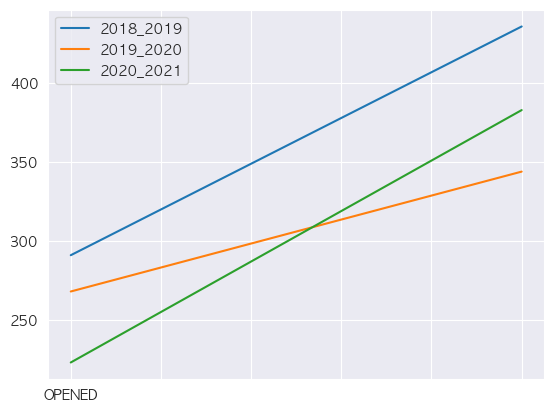

In [91]:
diff_df.plot()

`diff_df.T`
- .T 는 DataFrame 전치 (transpose)
- 행과 열을 뒤집는 작업

<Axes: >

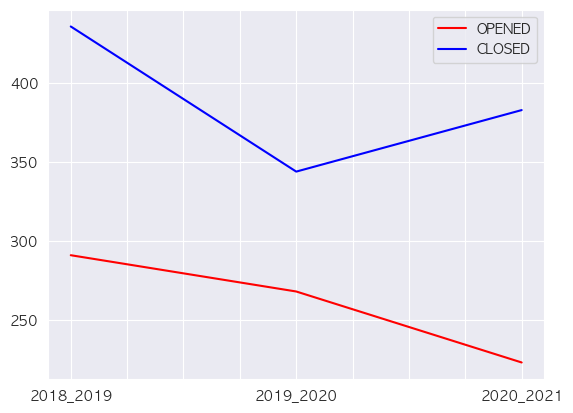

In [92]:
diff_df.T.plot(color=['r','b'])

#### 퀴즈 1. 2020년에 신규 개업한 셀프 주유소의 개수를 구하시오.

In [138]:
id_dict3 = dict()
for year in range(2018, 2022):
    non_null_brand = m.loc[(~m[f'상표_{year}'].isnull()) & (m['셀프여부'] == '셀프')]
    opened_list = non_null_brand['번호'].unique()
    id_dict3[year] = set(opened_list)

diff_dict3=dict()
for year in range(2018,2021):
    opened = len(id_dict3[year+1].difference(id_dict3[year]))
    closed = len(id_dict3[year].difference(id_dict3[year+1]))
    diff_dict3[f'{year}_{year+1}']=[opened,closed]
diff_df3 = pd.DataFrame(diff_dict3,index=['OPENED','CLOSED'])  

diff_df3

,2018_2019,2019_2020,2020_2021
OPENED,189,172,136
CLOSED,139,117,143


In [137]:
quiz = m[(m['상표_2019'].isna()) & (~m['상표_2020'].isna())].loc[m['셀프여부']=='셀프']
len(quiz)

172

In [103]:
#  2020년에 신규 개업한 셀프 주유소의 개수를 구하여 quiz_1 변수에 저장합니다.
# 숫자형으로 저장합니다.
quiz_1 = 172

---

## 3. 브랜드 분석: 브랜드별 가격경쟁력 및 시장점유율 분석


### 3.1. 주요 브랜드별 가격 Line Plot 분석

In [104]:
brand_price_dict=dict()
for year in range(2018,2022):
    brand_price_dict[str(year)]=m.groupby(f'상표_{year}')[f'휘발유_{year}'].mean()

In [105]:
brand_price_df = pd.DataFrame(brand_price_dict)
brand_price_df

,2018,2019,2020,2021
GS칼텍스,1613.165695,1540.997849,1293.541879,1565.823135
NC오일,1580.880952,1513.285714,1256.357143,1542.619048
NH-OIL,1588.411114,1515.996650,1246.254150,1541.557866
S-OIL,1602.540115,1529.983482,1282.095394,1556.408657
SK가스,NaN,1488.000000,NaN,NaN
SK에너지,1625.460126,1547.655582,1293.732067,1565.577095
알뜰(ex),1581.561576,1494.770733,1213.862668,1503.712733
알뜰주유소,1580.825277,1501.781838,1243.666785,1528.513597
자가상표,1590.233309,1518.950920,1266.634483,1542.280423
현대오일뱅크,1600.777986,1528.850142,1284.379155,1559.624500


<Axes: >

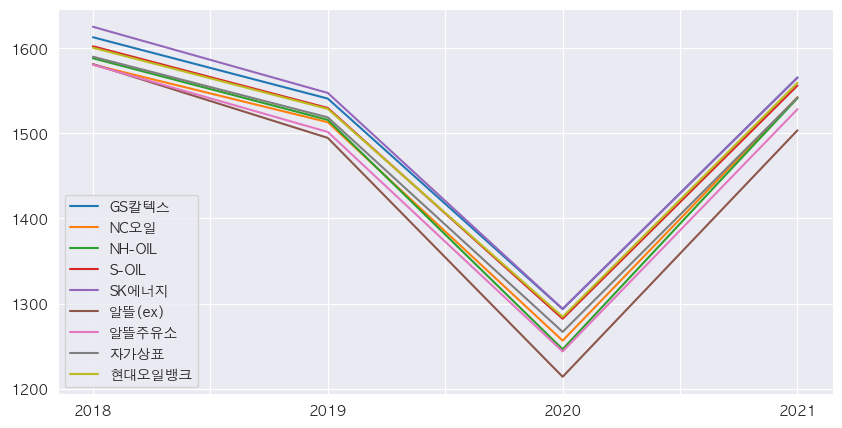

In [106]:
brand_price_df = brand_price_df.drop('SK가스') # SK가스는 2019년도에만 존재했고, 나머지 데이터가 없으므로 제거 
brand_price_df.T.plot(figsize=(10,5))

### 3.2. 주요 브랜드별 지난 4년간 시장 점유율 Stacked Bar Plot 및 Heatmap

In [107]:
brand_share_dict=dict()
for year in range(2018,2022):
    brand_share_dict[str(year)]=m.groupby(f'상표_{year}').size()

In [108]:
brand_share_df = pd.DataFrame(brand_share_dict)
brand_share_df

,2018,2019,2020,2021
GS칼텍스,2426.0,2391,2337.0,2295.0
NC오일,6.0,6,4.0,3.0
NH-OIL,581.0,597,611.0,632.0
S-OIL,2094.0,2093,2134.0,2124.0
SK가스,NaN,1,NaN,NaN
SK에너지,3474.0,3389,3075.0,2994.0
알뜰(ex),174.0,178,181.0,184.0
알뜰주유소,396.0,387,403.0,415.0
자가상표,199.0,163,145.0,135.0
현대오일뱅크,2206.0,2206,2445.0,2393.0


In [109]:
brand_share_df = brand_share_df.drop('SK가스')
brand_ratio_df = brand_share_df.apply(lambda x:x/brand_share_df.sum(),axis=1)
brand_ratio_df = brand_ratio_df.sort_values('2018',ascending=False)

In [110]:
brand_ratio_df

,2018,2019,2020,2021
SK에너지,0.300623,0.297020,0.271284,0.267919
GS칼텍스,0.209934,0.209553,0.206176,0.205369
현대오일뱅크,0.190897,0.193339,0.215704,0.214139
S-OIL,0.181205,0.183436,0.188266,0.190067
NH-OIL,0.050277,0.052323,0.053904,0.056555
알뜰주유소,0.034268,0.033918,0.035554,0.037136
자가상표,0.017220,0.014286,0.012792,0.012081
알뜰(ex),0.015057,0.015600,0.015968,0.016465
NC오일,0.000519,0.000526,0.000353,0.000268


<Axes: >

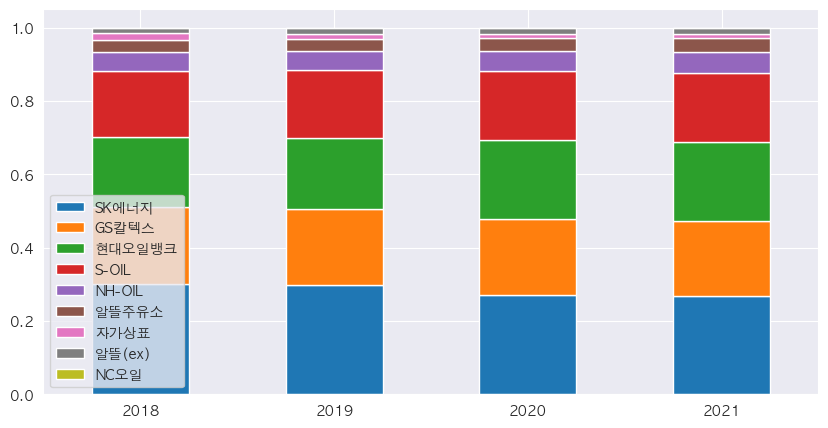

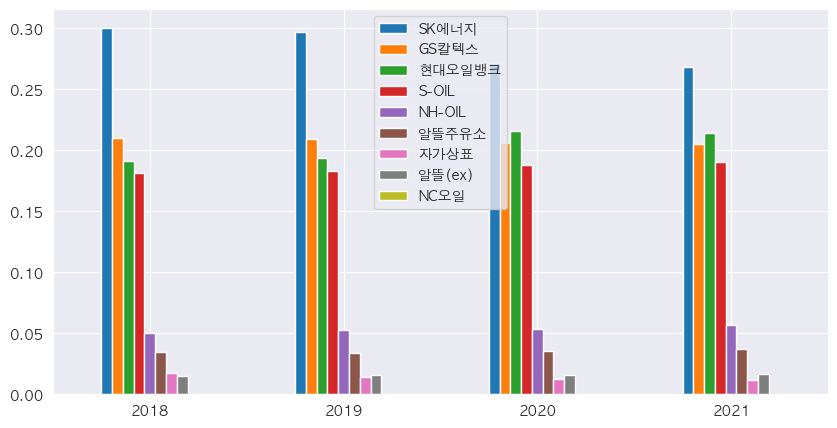

In [114]:
brand_ratio_df.T.plot(kind='bar',stacked=True,rot=0,figsize=(10,5)) #stacked=True : 누적형
brand_ratio_df.T.plot(kind='bar',rot=0,figsize=(10,5)) #stacked=True : 누적형

<Axes: >

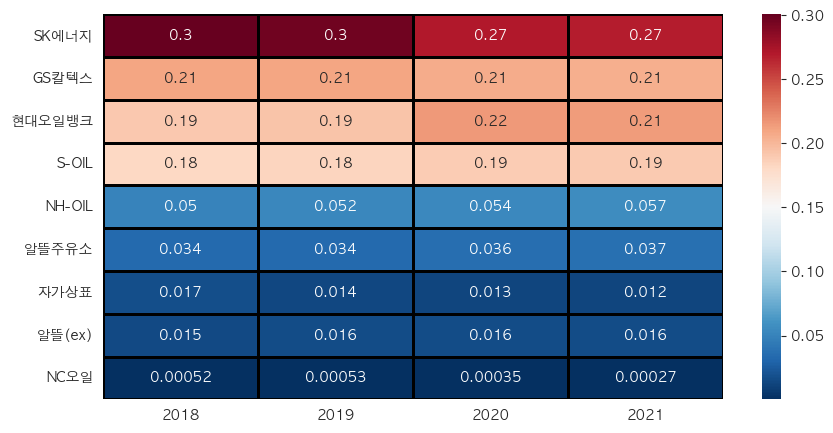

In [112]:
plt.figure(figsize=(10,5))
sns.heatmap(brand_ratio_df, cmap= 'RdBu_r', linewidths=1, linecolor='black',annot=True)

#### 퀴즈 2. 2019년 주유소를 셀프 및 일반 주유소로 구분하고 일반 주유소가 차지하는 비율을 구하시오

In [135]:
opened_2019 = m.loc[~m['상표_2019'].isnull()] # 2019년도에 운영중인 주유소들의 데이터
is_self = opened_2019.groupby('셀프여부').size()
self_ratio = is_self / is_self.sum()
self_ratio

셀프여부
셀프    0.399001
일반    0.600999
dtype: float64

In [ ]:
# 2019년 기준 일반 주유소의 시장 점유율을 quiz_2 변수에 저장합니다.
# 비율은 소숫점 둘째자리 까지 반올림하여 숫자형으로 제출합니다.
quiz_2 = 0.60

---

## 4. **가격 분석:** 주유소 및 지역 별 가격 편차 분석

### 4.1. 가격 분포 Boxplot

<Axes: xlabel='휘발유_2021'>

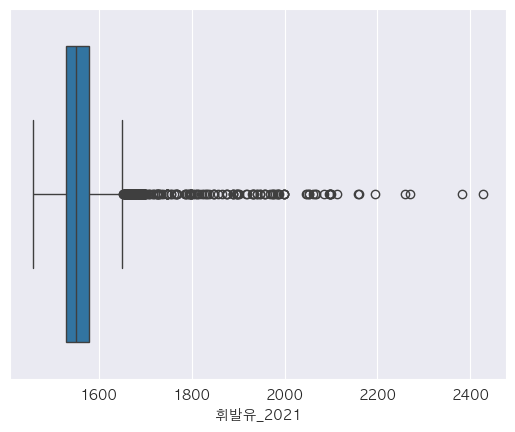

In [119]:
sns.boxplot(x=m['휘발유_2021'])

- Boxplot 설명:
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

### 4.2. 지역별 가격 분포 Boxplot (Multiple Columns)
지역으로 묶은 뒤, 각 지역의 2021년 휘발유 가격의 중앙값을 기준으로 졍렬하고 그 인덱스를 기록 <br>
&rarr; 중앙값 순위대로 그래프를 확인하기 위함

<Axes: xlabel='지역2', ylabel='휘발유_2021'>

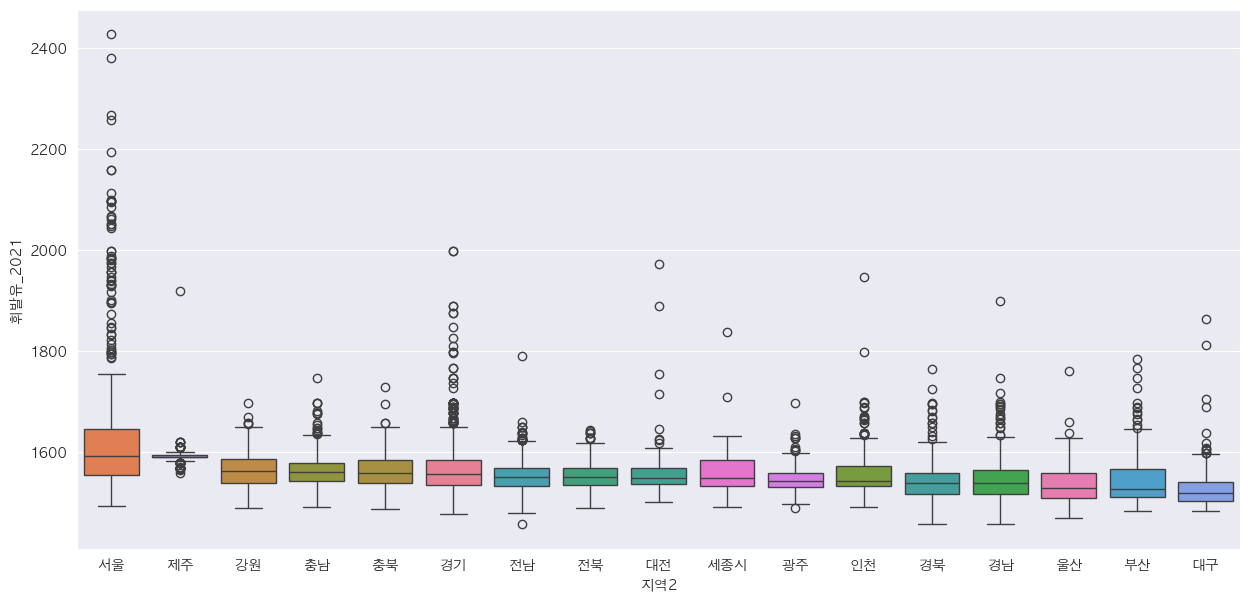

In [124]:
boxplot_order = m.groupby('지역2')['휘발유_2021'].median().sort_values(ascending=False).index
plt.figure(figsize=(15,7))
sns.boxplot(x="지역2", y="휘발유_2021", data=m, orient="v", order=boxplot_order, hue="지역2")

 ---

## 제출하기

퀴즈 1번과 2번을 수행 후, 아래 코드를 실행하면 `quiz_1 ~ 2` 변수가 저장된 json 파일을 제작하여 채점을 받을 수 있습니다.

**아래 코드를 수정하면 채점이 불가능 합니다.**

In [ ]:
import json

student_answers = {}
student_answers["problem_1"] = int(quiz_1)
student_answers["problem_2"] = float(quiz_2)

with open("result.json", "w") as f:
    json.dump(student_answers, f)

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>